In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load the Data**

In [3]:

df = pd.read_csv('/content/Electric Vehicle Sales by State in India.csv')

**Information about the data**

In [4]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [5]:
df.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [6]:
df.columns.nunique()

8

In [7]:
df.shape

(96845, 8)

In [8]:
df.dtypes

,0
Year,float64
Month_Name,object
Date,object
State,object
Vehicle_Class,object
Vehicle_Category,object
Vehicle_Type,object
EV_Sales_Quantity,float64


**Tranfrom the data type of features to requird **

In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df['Year'] =df['Year'].astype(int)

In [11]:
df.dtypes

,0
Year,int64
Month_Name,object
Date,datetime64[ns]
State,object
Vehicle_Class,object
Vehicle_Category,object
Vehicle_Type,object
EV_Sales_Quantity,float64


In [12]:
cat_column =['Month_Name','State','Vehicle_Type','Vehicle_Category','Vehicle_Class']
df[cat_column] = df[cat_column].astype('category')

Check for missing values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int64         
 1   Month_Name         96845 non-null  category      
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  category      
 4   Vehicle_Class      96845 non-null  category      
 5   Vehicle_Category   96845 non-null  category      
 6   Vehicle_Type       96845 non-null  category      
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(1), int64(1)
memory usage: 2.7 MB


In [14]:
df.describe()

,Year,Date,EV_Sales_Quantity
count,96845.000000,96845,96845.000000
mean,2018.622768,2019-01-28 11:00:33.641385728,37.108896
min,2014.000000,2014-01-01 00:00:00,0.000000
25%,2016.000000,2016-08-01 00:00:00,0.000000
50%,2019.000000,2019-02-01 00:00:00,0.000000
75%,2021.000000,2021-09-01 00:00:00,0.000000
max,2024.000000,2024-01-01 00:00:00,20584.000000
std,2.895581,NaN,431.566675


In [15]:
df.isnull().sum()

,0
Year,0
Month_Name,0
Date,0
State,0
Vehicle_Class,0
Vehicle_Category,0
Vehicle_Type,0
EV_Sales_Quantity,0


In [16]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0


**Check for outliers**

<Axes: ylabel='EV_Sales_Quantity'>

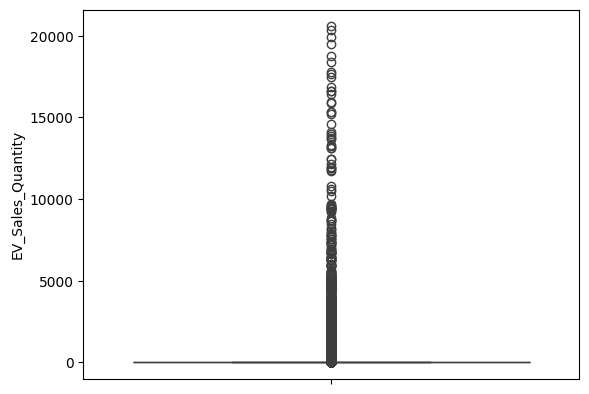

In [17]:
sns.boxplot(df['EV_Sales_Quantity'])

<Axes: xlabel='EV_Sales_Quantity', ylabel='Count'>

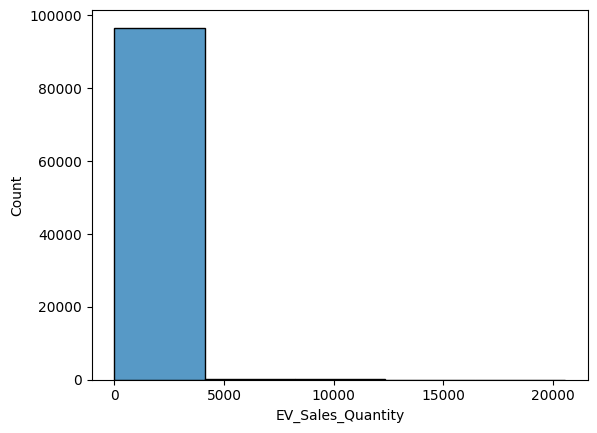

In [18]:
sns.histplot( x='EV_Sales_Quantity', data = df, bins = 5 )

In [19]:
df['EV_Sales_Quantity'].mean()

np.float64(37.10889565801022)

In [20]:
df['EV_Sales_Quantity'].median()

0.0

In [21]:
df['EV_Sales_Quantity'].value_counts()

,count
EV_Sales_Quantity,
0.0,82783
1.0,2481
2.0,1138
3.0,775
4.0,549
...,...
9365.0,1
1649.0,1
652.0,1


<Axes: xlabel='EV_Sales_Quantity', ylabel='Density'>

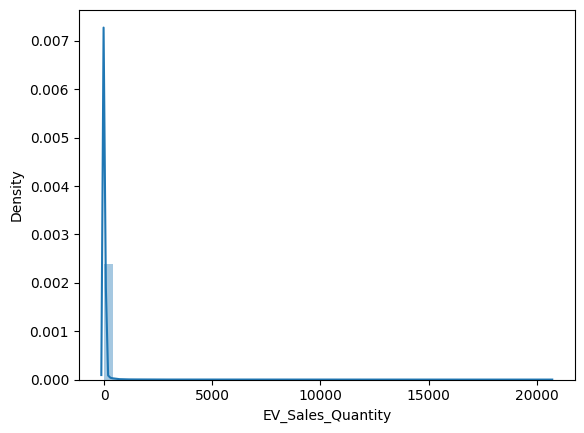

In [22]:
sns.distplot(df['EV_Sales_Quantity'])

In [23]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0


<Axes: xlabel='Month_Name', ylabel='count'>

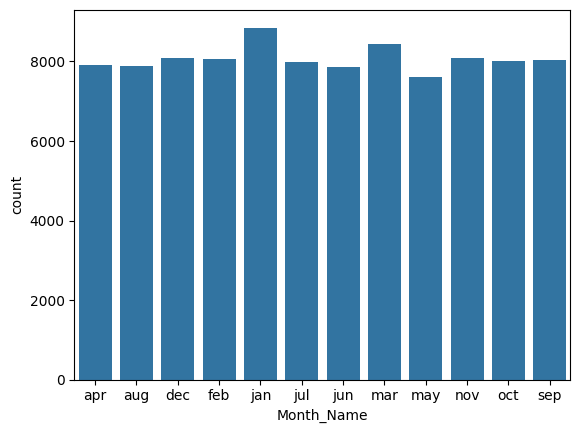

In [24]:
sns.countplot(x='Month_Name',data=df)

<Axes: xlabel='Month_Name', ylabel='EV_Sales_Quantity'>

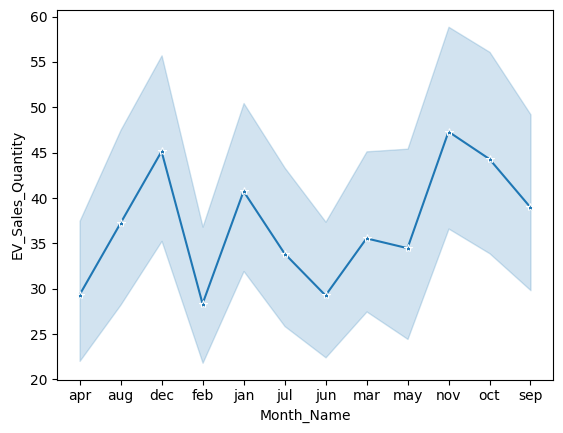

In [25]:
## EV sale over month
sns.lineplot(x='Month_Name',y ='EV_Sales_Quantity', data=df, marker='*')

Text(0.5, 1.0, 'EV sales over year')

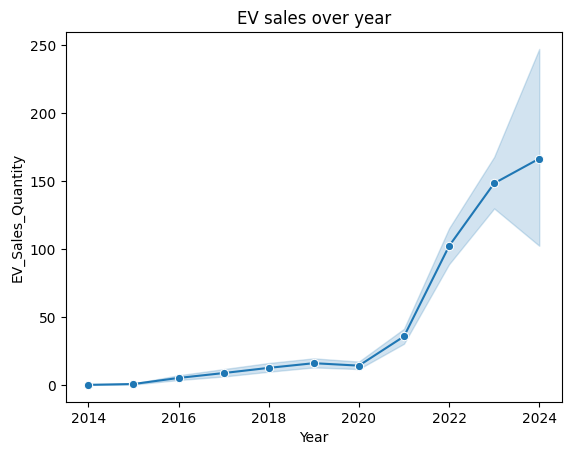

In [26]:
## EV sale over year
sns.lineplot(x='Year',y ='EV_Sales_Quantity', data=df, marker='o')
plt.title('EV sales over year')

<Axes: xlabel='Vehicle_Category', ylabel='count'>

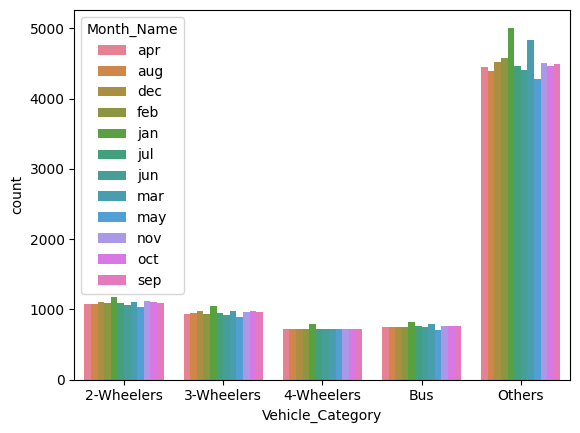

In [27]:
sns.countplot(x='Vehicle_Category',hue ='Month_Name', data=df)

<Axes: xlabel='Vehicle_Category', ylabel='EV_Sales_Quantity'>

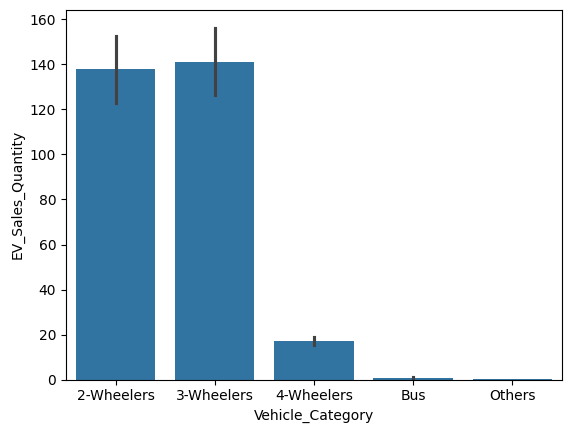

In [28]:
sns.barplot(x='Vehicle_Category',y ='EV_Sales_Quantity', data=df)

<Axes: xlabel='Vehicle_Category', ylabel='count'>

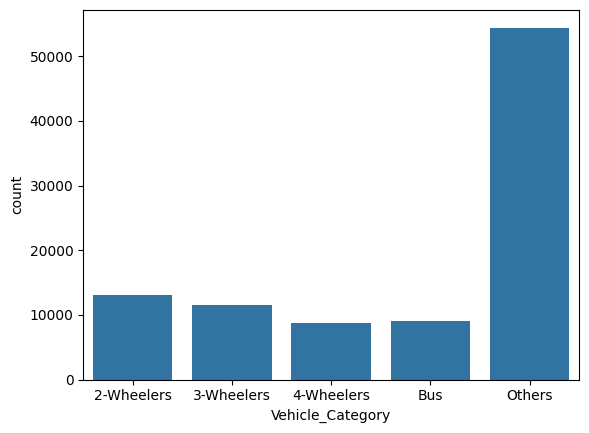

In [29]:
sns.countplot(x='Vehicle_Category', data=df)

In [30]:
df['Vehicle_Category'].value_counts()

,count
Vehicle_Category,
Others,54423
2-Wheelers,13121
3-Wheelers,11491
Bus,9119
4-Wheelers,8691


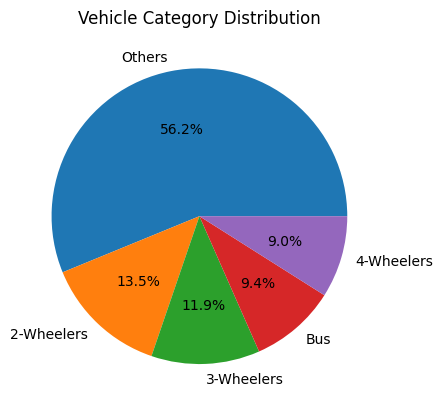

In [31]:
plt.pie(df['Vehicle_Category'].value_counts(), labels=df['Vehicle_Category'].value_counts().index, autopct='%1.1f%%')
plt.title('Vehicle Category Distribution')
plt.show()

<Axes: xlabel='EV_Sales_Quantity', ylabel='Vehicle_Type'>

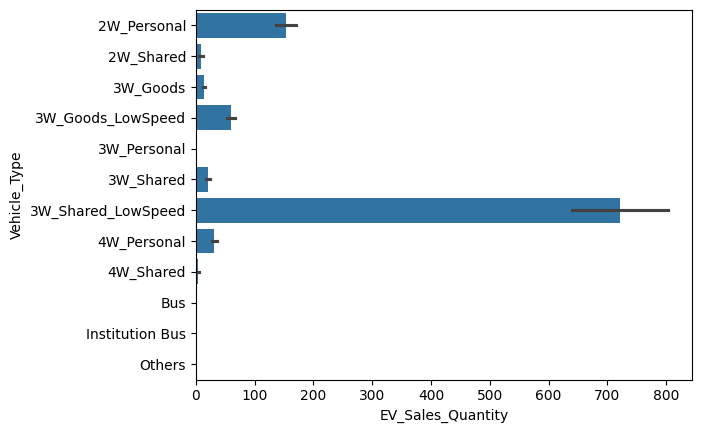

In [32]:
sns.barplot(x='EV_Sales_Quantity', y='Vehicle_Type', data=df)

In [33]:
df['Vehicle_Type'].value_counts()

,count
Vehicle_Type,
Others,54423
2W_Personal,11700
Bus,7026
4W_Shared,4580
4W_Personal,4111
3W_Shared,3786
3W_Goods,3208
Institution Bus,2093
3W_Shared_LowSpeed,1951


<Axes: xlabel='EV_Sales_Quantity', ylabel='State'>

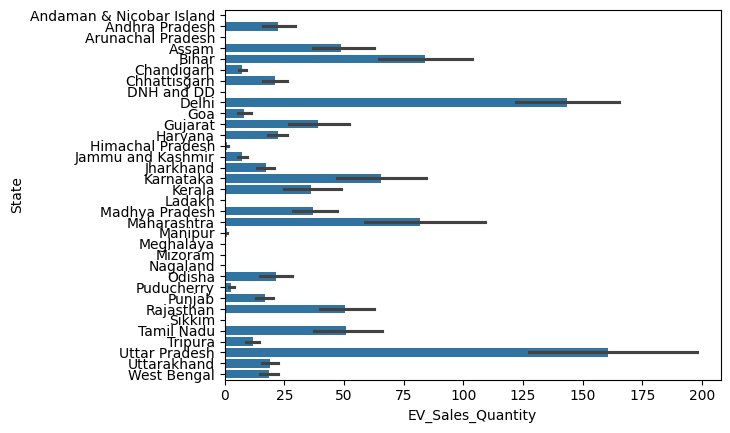

In [34]:
sns.barplot(y='State', x= 'EV_Sales_Quantity', data=df)

In [35]:
df['State'].value_counts()

,count
State,
Maharashtra,4912
Karnataka,4830
Uttar Pradesh,4557
Rajasthan,4552
Gujarat,4517
West Bengal,4196
Tamil Nadu,4063
Odisha,4027
Haryana,3842


In [36]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0


<Axes: xlabel='Vehicle_Class', ylabel='EV_Sales_Quantity'>

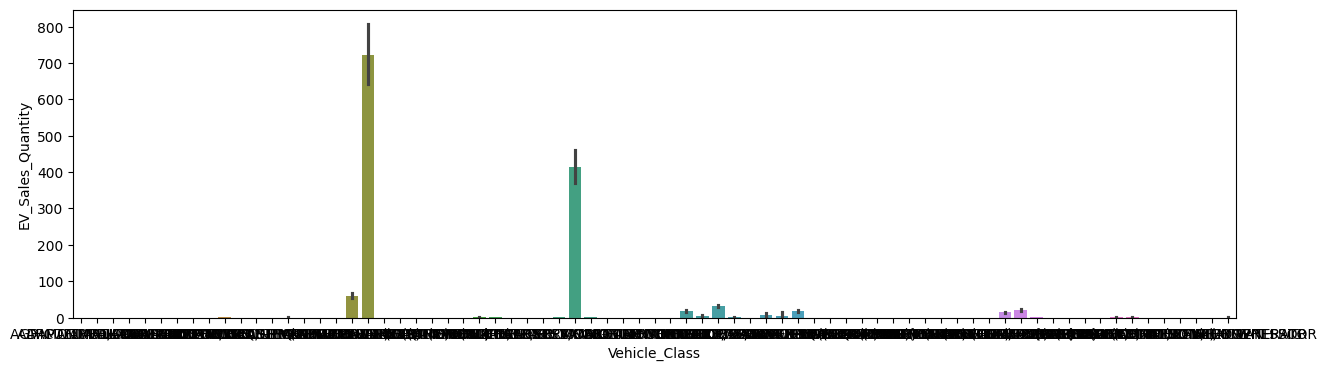

In [37]:
plt.figure(figsize=(15,4))
sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity', data=df, hue='Vehicle_Class')

Feature engineerin and One hot encoding for categ variable

In [38]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0


In [40]:
df['Month'] = df['Date'].dt.month

In [41]:
df['Month']

,Month
0,1
1,1
2,1
3,1
4,1
...,...
96840,12
96841,12
96842,12
96843,12


In [42]:
df['Day'] = df['Date'].dt.day

In [43]:
df['Day']

,Day
0,1
1,1
2,1
3,1
4,1
...,...
96840,1
96841,1
96842,1
96843,1


In [44]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Month,Day
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,1,1
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,1,1
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0,1,1
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0,1,1
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0,1,1


In [45]:
## one hot encoding of catg
cat_column =['State','Vehicle_Type','Vehicle_Category','Vehicle_Class']
df_encoded = pd.get_dummies(df, columns=cat_column, drop_first=True)

In [46]:
df_encoded

,Year,Month_Name,Date,EV_Sales_Quantity,Month,Day,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,...,Vehicle_Class_TRACTOR (COMMERCIAL),Vehicle_Class_TRACTOR-TROLLEY(COMMERCIAL),Vehicle_Class_TRAILER (AGRICULTURAL),Vehicle_Class_TRAILER (COMMERCIAL),Vehicle_Class_TRAILER FOR PERSONAL USE,Vehicle_Class_TREE TRIMMING VEHICLE,Vehicle_Class_VEHICLE FITTED WITH COMPRESSOR,Vehicle_Class_VEHICLE FITTED WITH GENERATOR,Vehicle_Class_VEHICLE FITTED WITH RIG,Vehicle_Class_X-RAY VAN
0,2014,jan,2014-01-01,0.0,1,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2014,jan,2014-01-01,0.0,1,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2014,jan,2014-01-01,0.0,1,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2014,jan,2014-01-01,0.0,1,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2014,jan,2014-01-01,0.0,1,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96840,2023,dec,2023-12-01,1.0,12,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96841,2023,dec,2023-12-01,5.0,12,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96842,2023,dec,2023-12-01,0.0,12,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96843,2023,dec,2023-12-01,0.0,12,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
df_encoded.drop(['Date', 'Month_Name'], axis=1, inplace=True)

In [48]:
df_encoded.head()

,Year,EV_Sales_Quantity,Month,Day,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,...,Vehicle_Class_TRACTOR (COMMERCIAL),Vehicle_Class_TRACTOR-TROLLEY(COMMERCIAL),Vehicle_Class_TRAILER (AGRICULTURAL),Vehicle_Class_TRAILER (COMMERCIAL),Vehicle_Class_TRAILER FOR PERSONAL USE,Vehicle_Class_TREE TRIMMING VEHICLE,Vehicle_Class_VEHICLE FITTED WITH COMPRESSOR,Vehicle_Class_VEHICLE FITTED WITH GENERATOR,Vehicle_Class_VEHICLE FITTED WITH RIG,Vehicle_Class_X-RAY VAN
0,2014,0.0,1,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2014,0.0,1,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2014,0.0,1,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2014,0.0,1,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2014,0.0,1,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


ML models for EV sales Prediction

In [ ]:
## LINEAR REGRSSION
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
x = df_encoded.drop('EV_Sales_Quantity',axis=1)
y = df_encoded['EV_Sales_Quantity']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#Model = RandomForestRegressor(n_estimators=100, random_state=42)
#Model = LinearRegression()
#Model = LogisticRegression()
#Model = XGBRegressor()
kernel = 1.0 * RBF(length_scale=1.0)
Model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
#Model = KNeighborsRegressor(n_neighbors=5)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

In [ ]:
r2_score = r2_score(y_test, y_pred)
print(r2_score)

0.6677874168207912


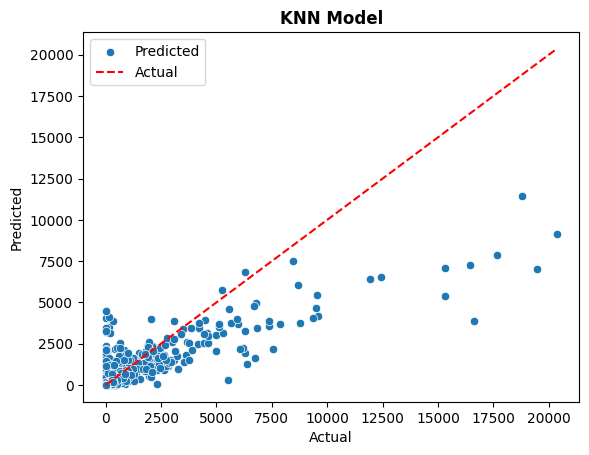

In [ ]:
sns.scatterplot( x = y_test, y= y_pred)
sns.lineplot( x = y_test, y = y_test, color = 'red',linestyle = 'dashed')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN Model",fontweight = "bold")
plt.legend(["Predicted", "Actual"])
plt.show()


In [ ]:
forecast_df = df_encoded[["Year","EV_Sales_Quantity"]].groupby("Year").sum().reset_index()
forecast_df

,Year,EV_Sales_Quantity
0,2014,2392.0
1,2015,7805.0
2,2016,49855.0
3,2017,87420.0
4,2018,130254.0
5,2019,166819.0
6,2020,124684.0
7,2021,331498.0
8,2022,1024723.0
9,2023,1525179.0


In [ ]:
forecast_df.Year

,Year
0,2014
1,2015
2,2016
3,2017
4,2018
5,2019
6,2020
7,2021
8,2022
9,2023


In [ ]:
df = pd.DataFrame(forecast_df)

In [ ]:
X = df[['Year']]
y = df['EV_Sales_Quantity']
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


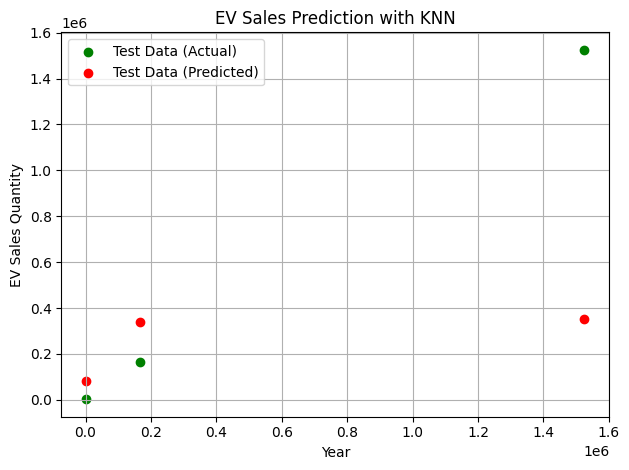

In [ ]:

# Model training

#model1 = LinearRegression()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)
plt.scatter(y_test, y_test, color='green', label='Test Data (Actual)')
plt.scatter(y_test, y_pred, color='red', label='Test Data (Predicted)')
#plt.plot(X, model.predict(X), color='black', linestyle='--', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('EV Sales Quantity')
plt.title('EV Sales Prediction with KNN')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.xticks(ticks=df['Year'], rotation=45)
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

798273.2127960117
476515.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
 x = df_encoded.drop('EV_Sales_Quantity',axis=1)
 y = df_encoded['EV_Sales_Quantity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_test['Year']

,Year
47450,2022
89305,2014
92585,2018
57102,2014
28937,2018
...,...
77484,2020
66522,2016
28710,2018
5020,2020


In [ ]:
Model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
Model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:

y_pred = Model.predict(X_test)

In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

130.5410734107275


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

10.734837627136146


In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)

843072269135931.9


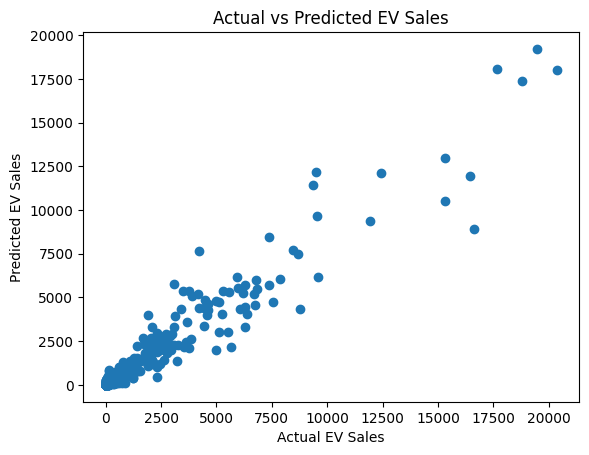

In [ ]:
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.show()

In [ ]:
importance = Model.feature_importances_
feature_importance = pd.Series(importance,
index=X_train.columns).sort_values(ascending=False)

In [ ]:
feature_importance

,0
Year,0.301937
State_Uttar Pradesh,0.169389
State_Maharashtra,0.153997
State_Karnataka,0.063386
Month,0.053875
...,...
Day,0.000000
Vehicle_Class_MODULAR HYDRAULIC TRAILER,0.000000
Vehicle_Class_MOTOR CARAVAN,0.000000
Vehicle_Class_TREE TRIMMING VEHICLE,0.000000
